In [1]:
from datasets import load_dataset
rottentom = load_dataset('rotten_tomatoes')

Found cached dataset parquet (/Users/mituljain/.cache/huggingface/datasets/parquet/rotten_tomatoes-83506428730e9da7/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
rottentom

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

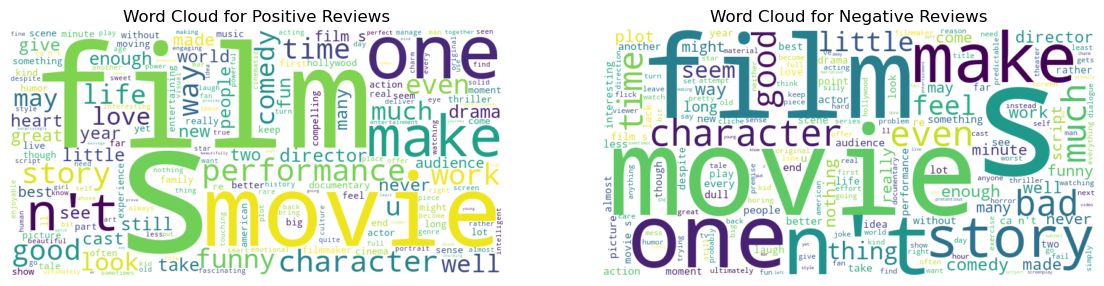

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = " ".join([sample['text'] for sample in preprocessed_train_data if sample['label'] == 1])
negative_reviews = " ".join([sample['text'] for sample in preprocessed_train_data if sample['label'] == 0])

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()


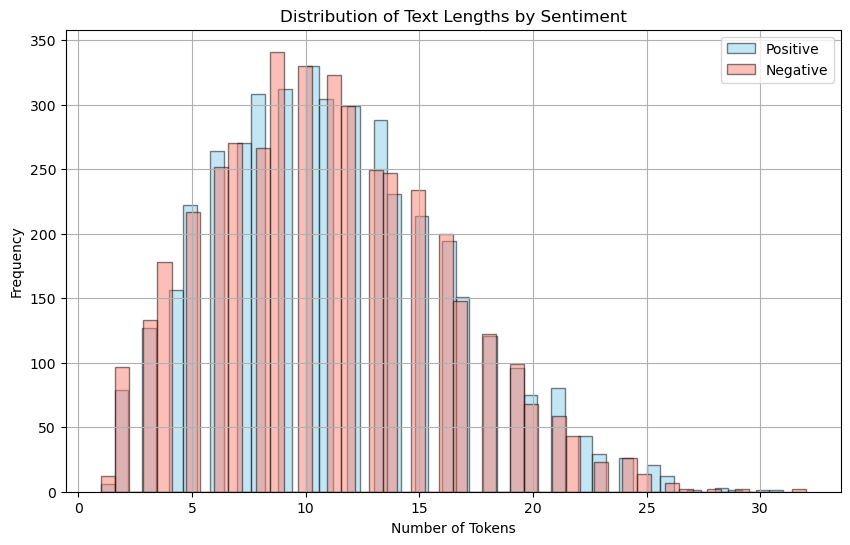

In [21]:
import matplotlib.pyplot as plt

# Separate positive and negative text lengths
positive_text_lengths = [len(sample['text'].split()) for sample in preprocessed_train_data if sample['label'] == 1]
negative_text_lengths = [len(sample['text'].split()) for sample in preprocessed_train_data if sample['label'] == 0]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(positive_text_lengths, bins=50, color='skyblue', alpha=0.5, label='Positive', edgecolor='black')
plt.hist(negative_text_lengths, bins=50, color='salmon', alpha=0.5, label='Negative', edgecolor='black')
plt.title('Distribution of Text Lengths by Sentiment')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


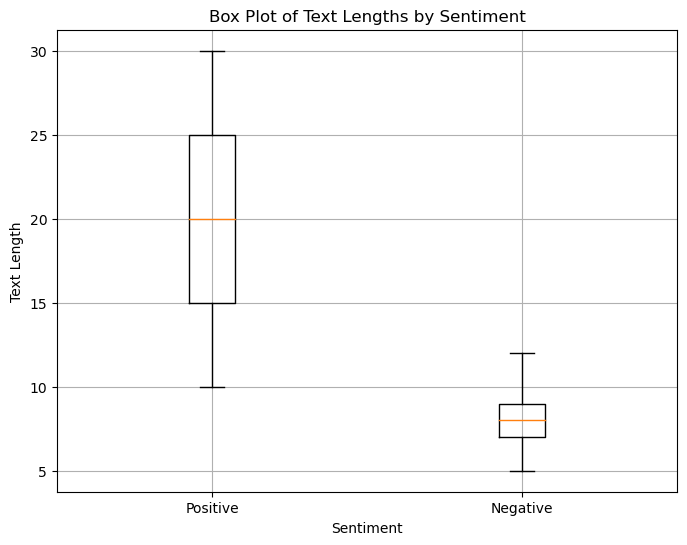

In [22]:
import matplotlib.pyplot as plt

# Example text lengths (replace these with the actual text lengths)
positive_text_lengths = [10, 20, 15, 25, 30]  # Example lengths of positive reviews
negative_text_lengths = [5, 8, 12, 7, 9]      # Example lengths of negative reviews

# Create box plots
plt.figure(figsize=(8, 6))
plt.boxplot([positive_text_lengths, negative_text_lengths], labels=['Positive', 'Negative'])
plt.title('Box Plot of Text Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.grid(True)
plt.show()


In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Load the Rotten Tomatoes dataset
train_data = rottentom['train']
validation_data = rottentom['validation']
test_data = rottentom['test']

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    
    # Reconstruct the preprocessed text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply the preprocessing function to each text sample in the dataset
preprocessed_train_data = [{'text': preprocess_text(sample['text']), 'label': sample['label']} for sample in train_data]
preprocessed_validation_data = [{'text': preprocess_text(sample['text']), 'label': sample['label']} for sample in validation_data]
preprocessed_test_data = [{'text': preprocess_text(sample['text']), 'label': sample['label']} for sample in test_data]

# Print the preprocessed data (optional)
print(preprocessed_train_data[:5])
print(preprocessed_validation_data[:5])
print(preprocessed_test_data[:5])


[nltk_data] Downloading package punkt to /Users/mituljain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mituljain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[{'text': "rock destined 21st century 's new `` conan `` 's going make splash even greater arnold schwarzenegger jean-claud van damme steven segal", 'label': 1}, {'text': "gorgeously elaborate continuation `` lord rings `` trilogy huge column words adequately describe co-writer/director peter jackson 's expanded vision j r r tolkien 's middle-earth", 'label': 1}, {'text': 'effective too-tepid biopic', 'label': 1}, {'text': 'sometimes like go movies fun wasabi good place start', 'label': 1}, {'text': "emerges something rare issue movie 's honest keenly observed n't feel like one", 'label': 1}]
[{'text': 'compassionately explores seemingly irreconcilable situation conservative christian parents estranged gay lesbian children', 'label': 1}, {'text': 'soundtrack alone worth price admission', 'label': 1}, {'text': 'rodriguez splendid job racial profiling hollywood style -- casting excellent latin actors ages -- trend long overdue', 'label': 1}, {'text': "beneath film 's obvious determinatio

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer

# Initialize CountVectorizer for BoW representation
count_vectorizer = CountVectorizer()

# Fit and transform the preprocessed text data to generate BoW vectors
X_train_bow = count_vectorizer.fit_transform([sample['text'] for sample in preprocessed_train_data])
X_validation_bow = count_vectorizer.transform([sample['text'] for sample in preprocessed_validation_data])
X_test_bow = count_vectorizer.transform([sample['text'] for sample in preprocessed_test_data])

# Print the shape of BoW vectors (optional)
print("Shape of BoW vectors for train data:", X_train_bow.shape)
print("Shape of BoW vectors for validation data:", X_validation_bow.shape)
print("Shape of BoW vectors for test data:", X_test_bow.shape)


Shape of BoW vectors for train data: (8530, 16410)
Shape of BoW vectors for validation data: (1066, 16410)
Shape of BoW vectors for test data: (1066, 16410)


/Users/mituljain/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mituljain/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mituljain/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mituljain/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mituljain/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.76      0.77      0.77       533
           1       0.77      0.76      0.76       533

    accuracy                           0.76      1066
   macro avg       0.76      0.76      0.76      1066
weighted avg       0.76      0.76      0.76      1066

Test Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       533
           1       0.78      0.77      0.77       533

    accuracy                           0.77      1066
   macro avg       0.77      0.77      0.77      1066
weighted avg       0.77      0.77      0.77      1066

Best Hyperparameters: {'C': 1, 'solver': 'lbfgs'}


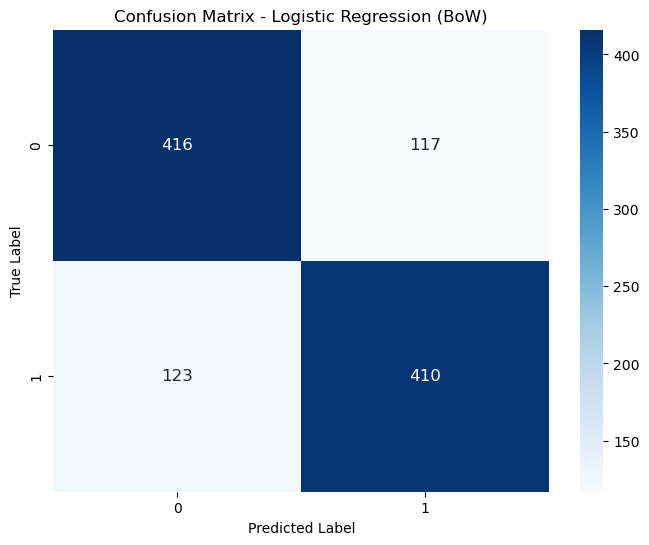

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'lbfgs', 'saga']}

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Perform grid search
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bow, [sample['label'] for sample in preprocessed_train_data])

# Get best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on validation data
predictions_validation_lr = best_model.predict(X_validation_bow)
print("Validation Classification Report (Logistic Regression):\n", classification_report([sample['label'] for sample in preprocessed_validation_data], predictions_validation_lr))

# Evaluate the best model on test data
predictions_test_lr = best_model.predict(X_test_bow)
print("Test Classification Report (Logistic Regression):\n", classification_report([sample['label'] for sample in preprocessed_test_data], predictions_test_lr))

# Print best hyperparameters
print("Best Hyperparameters:", best_params)

# Compute confusion matrix
conf_matrix = confusion_matrix([sample['label'] for sample in preprocessed_test_data], predictions_test_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"fontsize": 12})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (BoW)")
plt.show()


In [8]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the text data
train_texts = [sample['text'] for sample in preprocessed_train_data]
train_labels = [sample['label'] for sample in preprocessed_train_data]
validation_texts = [sample['text'] for sample in preprocessed_validation_data]
validation_labels = [sample['label'] for sample in preprocessed_validation_data]
test_texts = [sample['text'] for sample in preprocessed_test_data]
test_labels = [sample['label'] for sample in preprocessed_test_data]

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
validation_encodings = tokenizer(validation_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

# Convert labels to tensors
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
test_labels = torch.tensor(test_labels)

# Create TensorDatasets
train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']), torch.tensor(train_encodings['attention_mask']), train_labels)
validation_dataset = TensorDataset(torch.tensor(validation_encodings['input_ids']), torch.tensor(validation_encodings['attention_mask']), validation_labels)
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']), torch.tensor(test_encodings['attention_mask']), test_labels)

# Define batch size and create DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 3
for epoch in range(num_epochs):
    # Training
    model.train()
    total_loss = 0
    for input_ids, attention_mask, labels in train_loader:
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = total_loss / len(train_loader)
    
    # Validation
    model.eval()
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for input_ids, attention_mask, labels in validation_loader:
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())
    val_accuracy = sum(1 for x, y in zip(val_preds, val_labels) if x == y) / len(val_labels)
    print(f'Epoch {epoch+1}/{num_epochs}, Avg Train Loss: {avg_train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Evaluation on test set
test_preds = []
test_labels = []
with torch.no_grad():
    for input_ids, attention_mask, labels in test_loader:
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

# Classification report on test set
print("\nTest Classification Report (BERT):")
print(classification_report(test_labels, test_preds))


/Users/mituljain/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/mituljain/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Avg Train Loss: 0.5035, Validation Accuracy: 0.8030
Epoch 2/3, Avg Train Loss: 0.2907, Validation Accuracy: 0.8077
Epoch 3/3, Avg Train Loss: 0.1362, Validation Accuracy: 0.8021

Test Classification Report (BERT):
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       533
           1       0.81      0.79      0.80       533

    accuracy                           0.80      1066
   macro avg       0.80      0.80      0.80      1066
weighted avg       0.80      0.80      0.80      1066



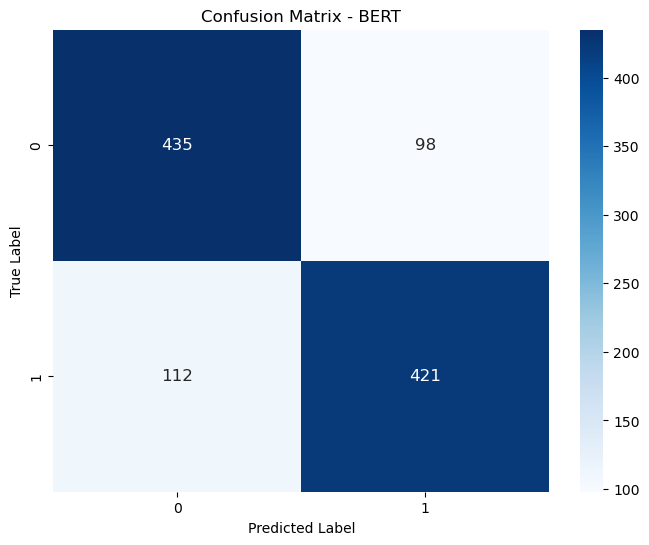

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix_bert = confusion_matrix(test_labels, test_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bert, annot=True, fmt="d", cmap="Blues", annot_kws={"fontsize": 12})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - BERT")
plt.show()


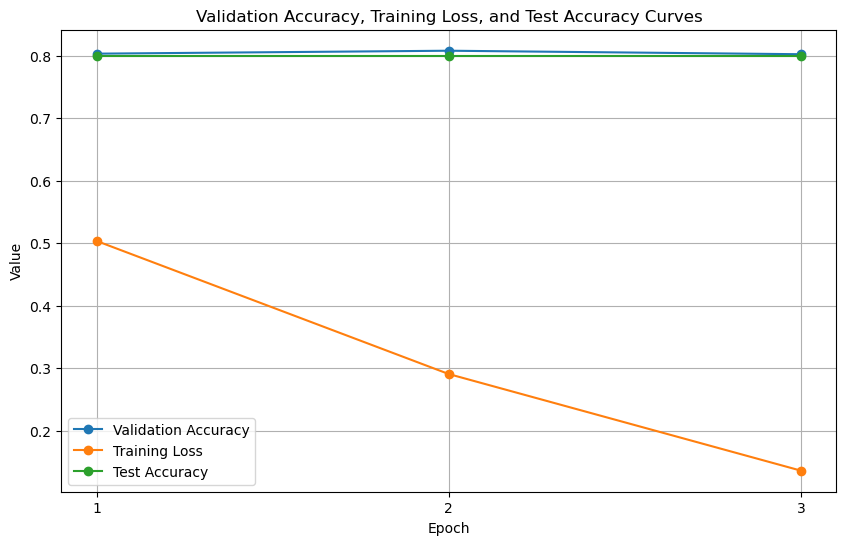

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy and loss values (replace these with the actual values)
val_accuracies = [0.8030, 0.8077, 0.8021]  # Validation accuracies for each epoch
train_losses = [0.5035, 0.2907, 0.1362]      # Training losses for each epoch
test_accuracies = [0.80, 0.80, 0.80]        # Test accuracies for each epoch

# Number of epochs
num_epochs = len(val_accuracies)

# Plot validation accuracy, training loss, and test accuracy curves
plt.figure(figsize=(10, 6))

# Validation accuracy curve
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='o')

# Training loss curve
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o')

# Test accuracy curve
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Validation Accuracy, Training Loss, and Test Accuracy Curves')
plt.xticks(range(1, num_epochs + 1))
plt.grid(True)
plt.legend()
plt.show()
